# Midterm Assignment

In [14]:
# 1. (a)
#             matrix 1                      matrix 2
# matrices: [ [[x,x,x], [x,x,x], [x,x,x]], [[x,x,x], [x,x,x], [x,x,x]] ]
# I assume to have y amount of matrices and that they are multiplied form left to right (so they are not seperated by braces)
def matrix_multiplication(matrices):

    multiplicand = matrices[0] # Matrix 1
    multiplier = matrices[1] # Matrix 2

    for matrix_index in range(0, len(matrices) - 1):

        multiplicand = multiply_two_matrices(multiplicand, multiplier) # multiply the two matrices
        try:
            multiplier = matrices[matrix_index + 1] # next Matrix after multiplying the previous two
        except IndexError:
            break

    return multiplicand

def multiply_two_matrices(matrix1, matrix2):
    rows = matrix1 # rows of matrix1 to multiply with
    columns = [list(x) for x in zip(*matrix2)] # columns of matrix2 to multiply with

    new_matrix = [] # new matrix to store the result
    for row in rows:
        new_row = [] # new row to store the result
        for column in columns:
            new_row.append(sum([a*b for a,b in zip(row, column)])) # multiply the row with the column and sum the result
        new_matrix.append(new_row) # append the new row to the new matrix
    return new_matrix

Size: 10x10, Time: 0.00010085105895996094 seconds
Size: 50x50, Time: 0.005234956741333008 seconds
Size: 100x100, Time: 0.03957200050354004 seconds
Size: 200x200, Time: 0.30070924758911133 seconds
Size: 500x500, Time: 4.330089092254639 seconds
Size: 800x800, Time: 17.100303888320923 seconds
Size: 1000x1000, Time: 32.89136004447937 seconds


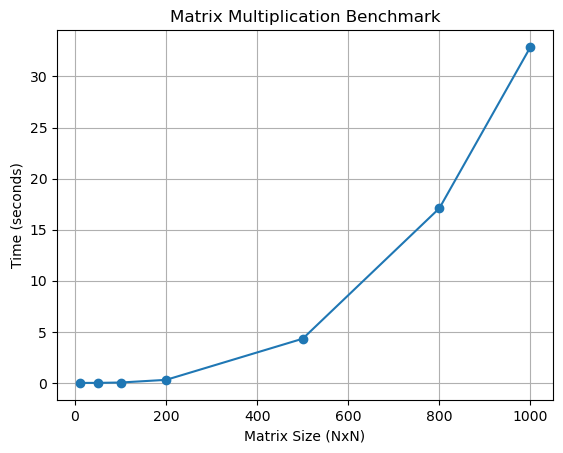

In [15]:
# 1. (b)

import numpy as np
import matplotlib.pyplot as plt
import time

matrix_sizes = [10, 50, 100, 200, 500, 800, 1000]
times = []

for size in matrix_sizes:
    matrix1 = np.random.randint(0, 10, (size, size)).tolist() 
    matrix2 = np.random.randint(0, 10, (size, size)).tolist()
    matrices = [matrix1, matrix2]

    start_time = time.time()
    matrix_multiplication(matrices)
    end_time = time.time()

    times.append(end_time - start_time)
    print(f"Size: {size}x{size}, Time: {end_time - start_time} seconds")

# Plotting the results
plt.plot(matrix_sizes, times, marker='o')
plt.xlabel('Matrix Size (NxN)')
plt.ylabel('Time (seconds)')
plt.title('Matrix Multiplication Benchmark')
plt.grid(True)
plt.show()

Size: 10x10, Time: 5.507469177246094e-05 seconds
Size: 50x50, Time: 0.0003840923309326172 seconds
Size: 100x100, Time: 0.0014557838439941406 seconds
Size: 200x200, Time: 0.007430076599121094 seconds
Size: 500x500, Time: 0.07697916030883789 seconds
Size: 800x800, Time: 0.5402729511260986 seconds
Size: 1000x1000, Time: 0.7694919109344482 seconds


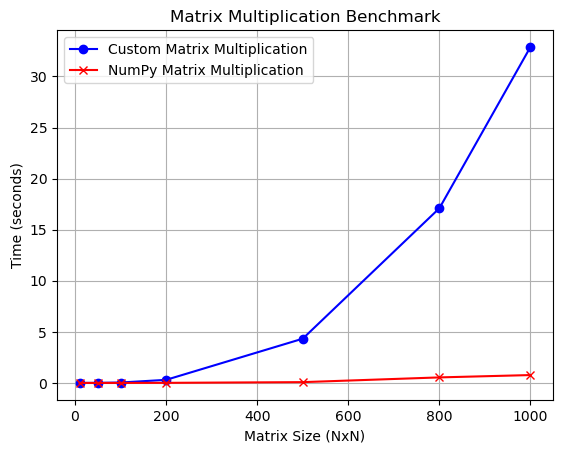

In [16]:
# 1. (c)

np_times = []

for size in matrix_sizes:
    matrix1 = np.random.randint(0, 10, (size, size)).tolist()
    matrix2 = np.random.randint(0, 10, (size, size)).tolist()
    matrices = [matrix1, matrix2]

    start_time = time.time()
    np.matmul(matrix1, matrix2)
    end_time = time.time()

    np_times.append(end_time - start_time)
    print(f"Size: {size}x{size}, Time: {end_time - start_time} seconds")

# Plotting the results
plt.plot(matrix_sizes, times, marker='o', label='Custom Matrix Multiplication', color='blue')
plt.plot(matrix_sizes, np_times, label='NumPy Matrix Multiplication', marker='x', color='red')
plt.xlabel('Matrix Size (NxN)')
plt.ylabel('Time (seconds)')
plt.title('Matrix Multiplication Benchmark')
plt.legend()
plt.grid(True)
plt.show()

#### 1. (d)
The time complexity of both methods differ as their implementations also differ

My implementation has a time complexity of O(n^3) as it contains 3 nested loops which iterate over the rows and columns of the matrices

NumPy's implementation is optimized and has a time complexity of O(n^2.807) as it uses the Strassen algorithm for matrix multiplication, which cleverly reduced the number of multiplications needed to multiply two matrices. This is done by dividing the matrices into submatrices and then multiplying them recursively. The Strassen algorithm is more efficient than the naive matrix multiplication algorithm, which is why it is faster for larger matrices.


Strassen: Size: 2x2, average Time: 4.621577262878418e-07 seconds
Strassen Recursive: Size: 2x2, Time: 8.40226411819458e-06 seconds
My Algorithm: Size: 2x2, Time: 2.1113872528076173e-06 seconds
NumPy: Size: 2x2, Time: 3.439795970916748e-06 seconds


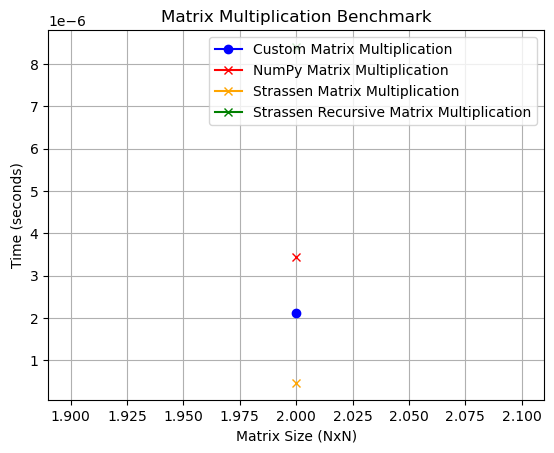

In [17]:
# 1. (e)

def strassen(matrix1, matrix2):
    
    a11 = matrix1[0][0]
    a12 = matrix1[0][1]
    a21 = matrix1[1][0]
    a22 = matrix1[1][1]
    
    b11 = matrix2[0][0]
    b12 = matrix2[0][1]
    b21 = matrix2[1][0]
    b22 = matrix2[1][1]

    m1 = (a11 + a22) * (b11 + b22)
    m2 = (a21 + a22) * b11
    m3 = a11 * (b12 - b22)
    m4 = a22 * (b21 - b11)
    m5 = (a11 + a12) * b22
    m6 = (a21 - a11) * (b11 + b12)
    m7 = (a12 - a22) * (b21 + b22)
    
    c11 = m1 + m4 - m5 + m7
    c12 = m3 + m5
    c21 = m2 + m4
    c22 = m1 - m2 + m3 + m6

    # Combine the submatrices into the final result matrix
    return [[c11, c12], [c21, c22]]

def add_matrices(matrix1, matrix2):
    return [[matrix1[i][j] + matrix2[i][j] for j in range(len(matrix1))] for i in range(len(matrix1))]

def subtract_matrices(matrix1, matrix2):
    return [[matrix1[i][j] - matrix2[i][j] for j in range(len(matrix1))] for i in range(len(matrix1))]

def split_matrix(matrix):
    n = len(matrix)
    mid = n // 2
    a11 = [row[:mid] for row in matrix[:mid]]
    a12 = [row[mid:] for row in matrix[:mid]]
    a21 = [row[:mid] for row in matrix[mid:]]
    a22 = [row[mid:] for row in matrix[mid:]]
    return a11, a12, a21, a22

def strassen_recursive(matrix1, matrix2):
    n = len(matrix1)
    
    if n == 1:
        return [[matrix1[0][0] * matrix2[0][0]]]
    
    a11, a12, a21, a22 = split_matrix(matrix1)
    b11, b12, b21, b22 = split_matrix(matrix2)
    
    m1 = strassen_recursive(add_matrices(a11, a22), add_matrices(b11, b22))
    m2 = strassen_recursive(add_matrices(a21, a22), b11)
    m3 = strassen_recursive(a11, subtract_matrices(b12, b22))
    m4 = strassen_recursive(a22, subtract_matrices(b21, b11))
    m5 = strassen_recursive(add_matrices(a11, a12), b22)
    m6 = strassen_recursive(subtract_matrices(a21, a11), add_matrices(b11, b12))
    m7 = strassen_recursive(subtract_matrices(a12, a22), add_matrices(b21, b22))
    
    c11 = add_matrices(subtract_matrices(add_matrices(m1, m4), m5), m7)
    c12 = add_matrices(m3, m5)
    c21 = add_matrices(m2, m4)
    c22 = add_matrices(subtract_matrices(add_matrices(m1, m3), m2), m6)
    
    new_matrix = []
    for i in range(len(c11)):
        new_matrix.append(c11[i] + c12[i])
    for i in range(len(c21)):
        new_matrix.append(c21[i] + c22[i])
    
    return new_matrix

strassen_times = []

# as the computation time can differ when computing it only once with that small size, I will compute it multiple times and take the average

iterations = 100000

size = 2

matrix1 = np.random.randint(0, 10, (size, size)).tolist()
matrix2 = np.random.randint(0, 10, (size, size)).tolist()
matrices = [matrix1, matrix2]

for _ in range(iterations):
    start_time = time.time()
    strassen(matrix1, matrix2)
    end_time = time.time()
    
    strassen_times.append(end_time - start_time)
average_time = sum(strassen_times)/len(strassen_times)
print(f"Strassen: Size: {size}x{size}, average Time: {average_time} seconds")
strassen_times = [average_time]

strassen_recursive_times = []
for _ in range(iterations):
    start_time = time.time()
    strassen_recursive(matrix1, matrix2)
    end_time = time.time()
    
    strassen_recursive_times.append(end_time - start_time)
    
average_time = sum(strassen_recursive_times)/len(strassen_recursive_times)
print(f"Strassen Recursive: Size: {size}x{size}, Time: {average_time} seconds")
strassen_recursive_time = [average_time]

my_times = []

for _ in range(iterations):
    start_time = time.time()
    matrix_multiplication(matrices)
    end_time = time.time()
    
    my_times.append(end_time - start_time)
average_time = sum(my_times)/len(my_times)
print(f"My Algorithm: Size: {size}x{size}, Time: {average_time} seconds")
my_times = [average_time]

np_times = []

for _ in range(iterations):
    start_time = time.time()
    np.matmul(matrix1, matrix2)
    end_time = time.time()
    
    np_times.append(end_time - start_time)
    
average_time = sum(np_times)/len(np_times)
print(f"NumPy: Size: {size}x{size}, Time: {average_time} seconds")
np_times = [average_time]

# Plotting the results
plt.plot([2], my_times, marker='o', label='Custom Matrix Multiplication', color='blue')
plt.plot([2], np_times, label='NumPy Matrix Multiplication', marker='x', color='red')
plt.plot([2], strassen_times, label='Strassen Matrix Multiplication', marker='x', color='orange')
plt.plot([2], strassen_recursive_time, label='Strassen Recursive Matrix Multiplication', marker='x', color='green')
plt.xlabel('Matrix Size (NxN)')
plt.ylabel('Time (seconds)')
plt.title('Matrix Multiplication Benchmark')
plt.legend()
plt.grid(True)
plt.show()